In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [9]:
dfx = pd.read_csv('./Training Data/Train.csv')
dtx = pd.read_csv('./Testing Data/Test.csv')

x = dfx.values
xt = dtx.values
y = x[:,-1:]
x = x[:,:-1]
print(xt)

[[ 1.01525387e+00  2.07620944e+00 -2.66434820e-01 -2.41808820e+00
  -9.80502790e-01]
 [-3.75021204e-01  9.53184528e-01  6.26719138e-01  7.04405750e-01
  -3.55489211e-01]
 [-1.02445225e+00  9.62991107e-01 -4.07942004e-01 -1.86127383e+00
   4.55201351e-01]
 ...
 [ 5.54727647e-01  1.76824345e+00 -8.97787210e-01 -1.19366107e+00
   3.40563374e-01]
 [-1.62717246e+00  8.56470994e-01 -5.65729519e-04  6.29386649e-01
   4.53382144e-01]
 [ 1.39310499e-01  5.31597186e-01 -8.53107053e-01  3.16920076e-02
   1.71489304e+00]]


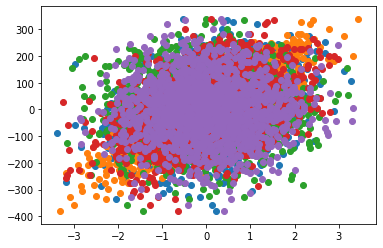

In [10]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,1],y)
plt.scatter(x[:,2],y)
plt.scatter(x[:,3],y)
plt.scatter(x[:,4],y)
plt.show()

In [18]:
def hypothesis(x,i,theta):
    return (theta[0]+theta[1]*x[i][0]+theta[2]*x[i][1]+theta[3]*x[i][2]+theta[4]*x[i][3]+theta[5]*x[i][4])

def error(x,y,theta):
    err=0
    for i in range(x.shape[0]):
        dx = hypothesis(x,i,theta)
        err += (y[i]-dx)**2
    return err

def gradient(x,y,theta):
    grad = np.zeros((6,))
    for i in range(x.shape[0]):
        dx = hypothesis(x,i,theta)
        grad[0] += dx-y[i]
        grad[1] += (dx-y[i])*x[i][0]
        grad[2] += (dx-y[i])*x[i][1]
        grad[3] += (dx-y[i])*x[i][2]
        grad[4] += (dx-y[i])*x[i][3]
        grad[5] += (dx-y[i])*x[i][4]
    return grad

def gradient_desc(x,y,lr=0.001):
    theta=np.array([-2.0, 0.0, 1.0, -1.0, 2.0, 3.0])
    itr=0
    error_list=[]
    theta_list=[]
    while(itr<200):
        grad=gradient(x,y,theta)
        e=error(x,y,theta)
        error_list.append(e)
        theta_list.append((theta[0],theta[1],theta[2],theta[3],theta[4],theta[5]))
        
        theta[0]-=lr*grad[0]
        theta[1]-=lr*grad[1]
        theta[2]-=lr*grad[2]
        theta[3]-=lr*grad[3]
        theta[4]-=lr*grad[4]
        theta[5]-=lr*grad[5]
        itr+=1
    return (theta,error_list,theta_list)


In [19]:
f_theta,err_l,the_l=gradient_desc(x,y)

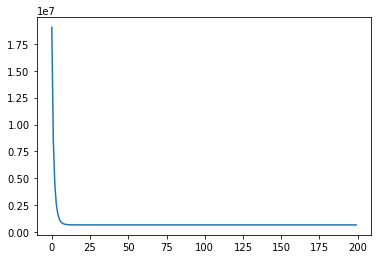

In [20]:
plt.plot(err_l)

In [23]:
print(f_theta)

[ 4.99096674 29.68187118 92.66247759  8.28062089 44.76773522  2.51916121]


In [28]:
for i in range(xt.shape[0]):
    yt = hypothesis(xt,i,f_theta)
    print(yt)

114.58368923196372
118.01281465828444
-21.73985232924245
-43.936898541400765
-95.91489844208449
-44.50742395660596
-75.56652596221407
23.820835485669633
173.83528378563457
172.8492895695679
-105.40231168859385
-20.80202343203156
-3.9132377724323653
122.99918625290397
40.307884207555894
45.712849511051175
-189.6284909238686
22.612545403086834
11.64104731274628
136.34214311963225
64.91625523223442
-61.98848843720608
-108.19467902060549
-7.412127467739345
-58.52395275408494
11.888977748249125
29.237640028738408
107.68757889279811
24.146856340743064
-26.10501203356278
110.96807606148187
-44.87970964144713
216.7999390647439
-13.86060516447299
-228.60318237978953
154.89602116368772
-2.225833895947332
12.72303442620081
-308.30787668818874
77.11075832295658
-81.20791770025568
-206.63292494158944
-238.7628813624671
134.75736517848895
-73.75147767846357
105.4637023512691
-3.590749267486817
20.60438394898598
-98.0187353945519
-27.516904913914015
10.815900096826581
-174.46353402433934
65.155751778